# Tratamento de Outliers
São dados que se dierenciam drasticamente de todos os outros, são pontos fora da curva normal, em outras palavras, um outlier é um valor que foge da normalidade que pode causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.
Entelos é fundamental para pelo menos dois aspectos.
* Os outliers podem viesar negativamente todo o resultado de uma análise;
* O comportamento dos outliers pode ser justamente o que está sendo procurado.
Outliers presentes em datasets.
* Dados discrepantes;
* Pontos fora da curva;
* Observações fora do comum;
* Anomalias;
* Valores atípicos;
* Entre outros.

## Case: Outliers no mercado financeiro brasileiro.
No dia 17 de maio de 2017 as ações da Petrobás cairam 15,8% e o indice da (IBOVESPA) teve uma queda de 8,8% em um unico dia, neste caso, a maioria das ações da bolsa brasileira viram seu preço despencar neste dia. Essa forte variação negativa teve como principal motivação a delação de Joesley Batista, um dos eventos políticos mais impactantesque aconteceram no primeiro semestre de 2017. 

Esse caso representa um outlier para o analista que, por exemplo, deseja saber qual foi a média de retornos diários das ações da Petrobrás nos últimos 180 dias. Certamente o dia da delação de Joesley afetou fortemente a média para baixo.

![img](https://www.aquare.la/wp-content/uploads/image3.png)

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt

In [4]:

# definições para gráficos
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 20

# df_train é o nosso dataframe com os dados de treinamento para construção de nosso modelo.
df_train = pd.read_csv('lab2_train_no_nulls.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Remoção de nulos.


In [5]:
print(df_train.isnull().any())
print()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool



In [6]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [7]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.839174,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Como observado acima, temos 891 registros ao todo. As colunas Age, Cabin e Embarked são as que possuem valores nulos. O caso da coluna Cabin é o mais crítico, pois ele possui apenas 22% de dados preenchidos (provavelmente apenas pessoas da primeira classe) e essa informação pode não ser muito útil. Nesse caso, vamos simplesmente remover a coluna de nossos dados.

29.839173669467783
29.839173669467783


Text(0.5, 1.0, 'Idade')

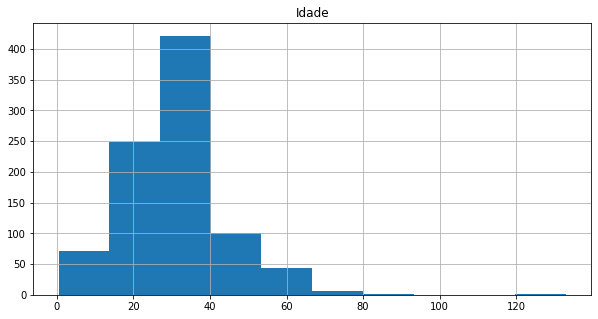

In [8]:
media_idade = df_train['Age'].mean()
mediana_idade = df_train['Age'].median()

print(media_idade)
print(mediana_idade)

df_train['Age'].hist()
plt.title('Idade')

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.839174,0.523008,0.381594,37.234698
std,257.353842,0.486592,0.836071,13.454159,1.102743,0.806057,173.359298
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-10.100000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.839174,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,133.000000,8.000000,6.000000,5012.329200


* A menor tarifa é negativa e a maior é um número 10x maior que o terceiro Quartil(75%)
* Há alguém com idade 133 anos. Hojejá parece improvavel.

In [10]:
print(df_train.sort_values('Age', ascending=False).head(5)['Age'])
print(df_train.sort_values('Age', ascending=True).head(5)['Age'])

103    133.0
630     80.0
851     74.0
493     71.0
96      71.0
Name: Age, dtype: float64
803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
Name: Age, dtype: float64


In [11]:
df_train.loc[df_train['Age'] == 133, 'Age'] = media_idade

In [12]:
print(df_train.sort_values('Age', ascending=False).head(5)['Age'])
print(df_train.sort_values('Age', ascending=True).head(5)['Age'])

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64
803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
Name: Age, dtype: float64


In [13]:
print(df_train.sort_values('Fare', ascending=False).head(5)['Fare'])
print(df_train.sort_values('Fare', ascending=True).head(5)['Fare'])

258    5012.3292
737     512.3292
679     512.3292
88      263.0000
27      263.0000
Name: Fare, dtype: float64
156   -10.1
413     0.0
674     0.0
263     0.0
732     0.0
Name: Fare, dtype: float64


Aqui podemos notar o valor negativo e um valor 10 vezes maior do bilhete mais caro para o segundo mais caro. Dessa vez vamos usar a mediana em vez da média.

In [14]:
media_tarifa = df_train['Fare'].median()
df_train.loc[df_train['Fare']>5000, 'Fare'] = media_tarifa
df_train.loc[df_train['Fare']<0, 'Fare'] = media_tarifa

In [15]:
print(df_train.sort_values('Fare', ascending=False).head(5)['Fare'])
print(df_train.sort_values('Fare', ascending=True).head(5)['Fare'])

679    512.3292
737    512.3292
88     263.0000
27     263.0000
438    263.0000
Name: Fare, dtype: float64
277    0.0
481    0.0
413    0.0
597    0.0
633    0.0
Name: Fare, dtype: float64


In [16]:
df_train.to_csv('train_no_nulls_no_outliers.csv',index=False)